In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('../data/student-por.csv')

In [15]:
Y = data[['G1', 'G2', 'G3']].sum(axis=1)
X = data.drop(['G1', 'G2', 'G3'], axis=1)
X = (X-X.min())/(X.max()-X.min())
Y = Y.apply(lambda x: 1 if x > 36 else 0)

In [4]:
print(X.head())
print(Y.head())

   school  sex       age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0     0.0  0.0  0.428571      1.0      0.0      0.0  1.00  1.00  0.00  1.00   
1     0.0  0.0  0.285714      1.0      0.0      1.0  0.25  0.25  0.00  0.50   
2     0.0  0.0  0.000000      1.0      1.0      1.0  0.25  0.25  0.00  0.50   
3     0.0  0.0  0.000000      1.0      0.0      1.0  1.00  0.50  0.25  0.75   
4     0.0  0.0  0.142857      1.0      0.0      1.0  0.75  0.75  0.50  0.50   

   ...  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  \
0  ...     1.0       0.0       0.0    0.75      0.50   0.75  0.00  0.00   
1  ...     1.0       1.0       0.0    1.00      0.50   0.50  0.00  0.00   
2  ...     1.0       1.0       0.0    0.75      0.50   0.25  0.25  0.50   
3  ...     1.0       1.0       1.0    0.50      0.25   0.25  0.00  0.00   
4  ...     1.0       0.0       0.0    0.75      0.50   0.25  0.00  0.25   

   health  absences  
0     0.5    0.1250  
1     0.5    0.0625  
2     0.

In [5]:
# prints out the number of 0s and 1s in each grade classification 
print(Y.value_counts())

0    373
1    276
Name: count, dtype: int64


In [6]:
data.std()

school        0.476776
sex           0.492187
age           1.218138
address       0.460143
famsize       0.456771
Pstatus       0.328996
Medu          1.134552
Fedu          1.099931
Mjob          1.248317
Fjob          0.863487
reason        1.192045
guardian      0.519187
traveltime    0.748660
studytime     0.829510
failures      0.593235
schoolsup     0.306502
famsup        0.487381
paid          0.237841
activities    0.500171
nursery       0.398212
higher        0.308481
internet      0.422857
romantic      0.482704
famrel        0.955717
freetime      1.051093
goout         1.175766
Dalc          0.924834
Walc          1.284380
health        1.446259
absences      4.640759
G1            2.745265
G2            2.913639
G3            3.230656
dtype: float64

school       -0.216612
sex          -0.121178
age          -0.111140
address       0.154401
famsize       0.029692
Pstatus      -0.018757
Medu          0.250064
Fedu          0.210895
Mjob          0.152817
Fjob          0.079145
reason        0.122862
guardian     -0.080321
traveltime   -0.178832
studytime     0.196043
failures     -0.295689
schoolsup    -0.050051
famsup        0.004753
paid         -0.073249
activities    0.068846
nursery       0.066065
higher        0.276473
internet      0.126987
romantic     -0.081672
famrel        0.075510
freetime     -0.073464
goout        -0.084976
Dalc         -0.214624
Walc         -0.178247
health       -0.131542
absences     -0.149890
dtype: float64


<Axes: title={'center': 'Correlation with Final Grade'}>

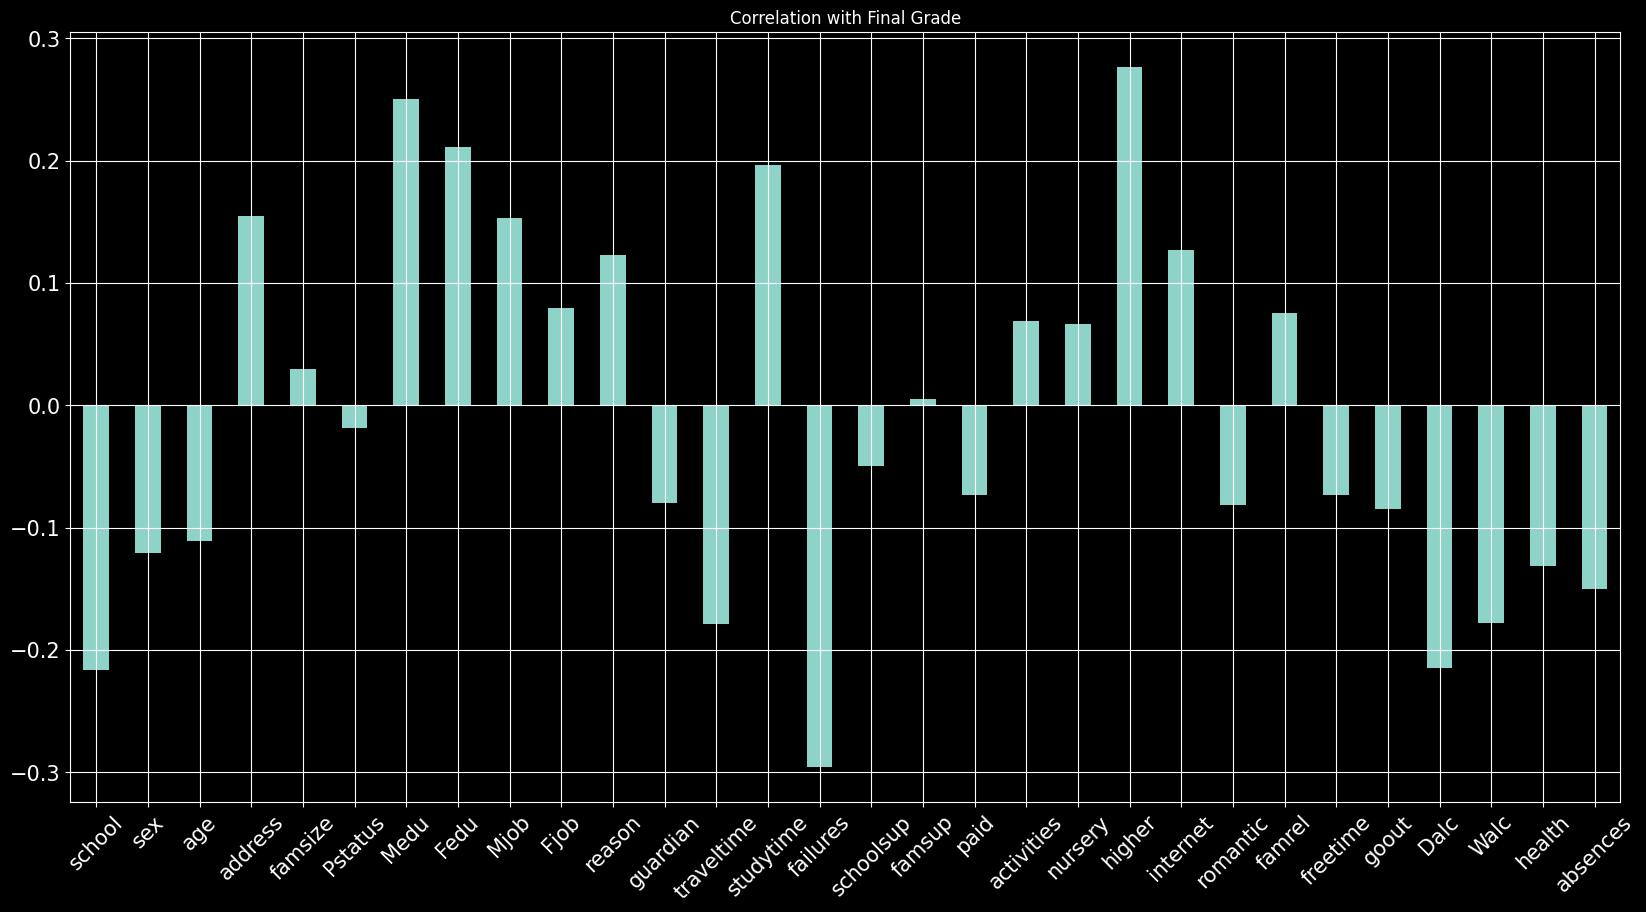

school       -0.284294
sex          -0.129077
age          -0.106505
address       0.167637
famsize       0.045016
Pstatus      -0.000754
Medu          0.240151
Fedu          0.211800
Mjob          0.148252
Fjob          0.052953
reason        0.124969
guardian     -0.079609
traveltime   -0.127173
studytime     0.249789
failures     -0.393316
schoolsup    -0.066405
famsup        0.059206
paid         -0.054898
activities    0.059791
nursery       0.028752
higher        0.332172
internet      0.150025
romantic     -0.090583
famrel        0.063361
freetime     -0.122705
goout        -0.087641
Dalc         -0.204719
Walc         -0.176619
health       -0.098851
absences     -0.091379
dtype: float64


<Axes: title={'center': 'Correlation with Final Grade'}>

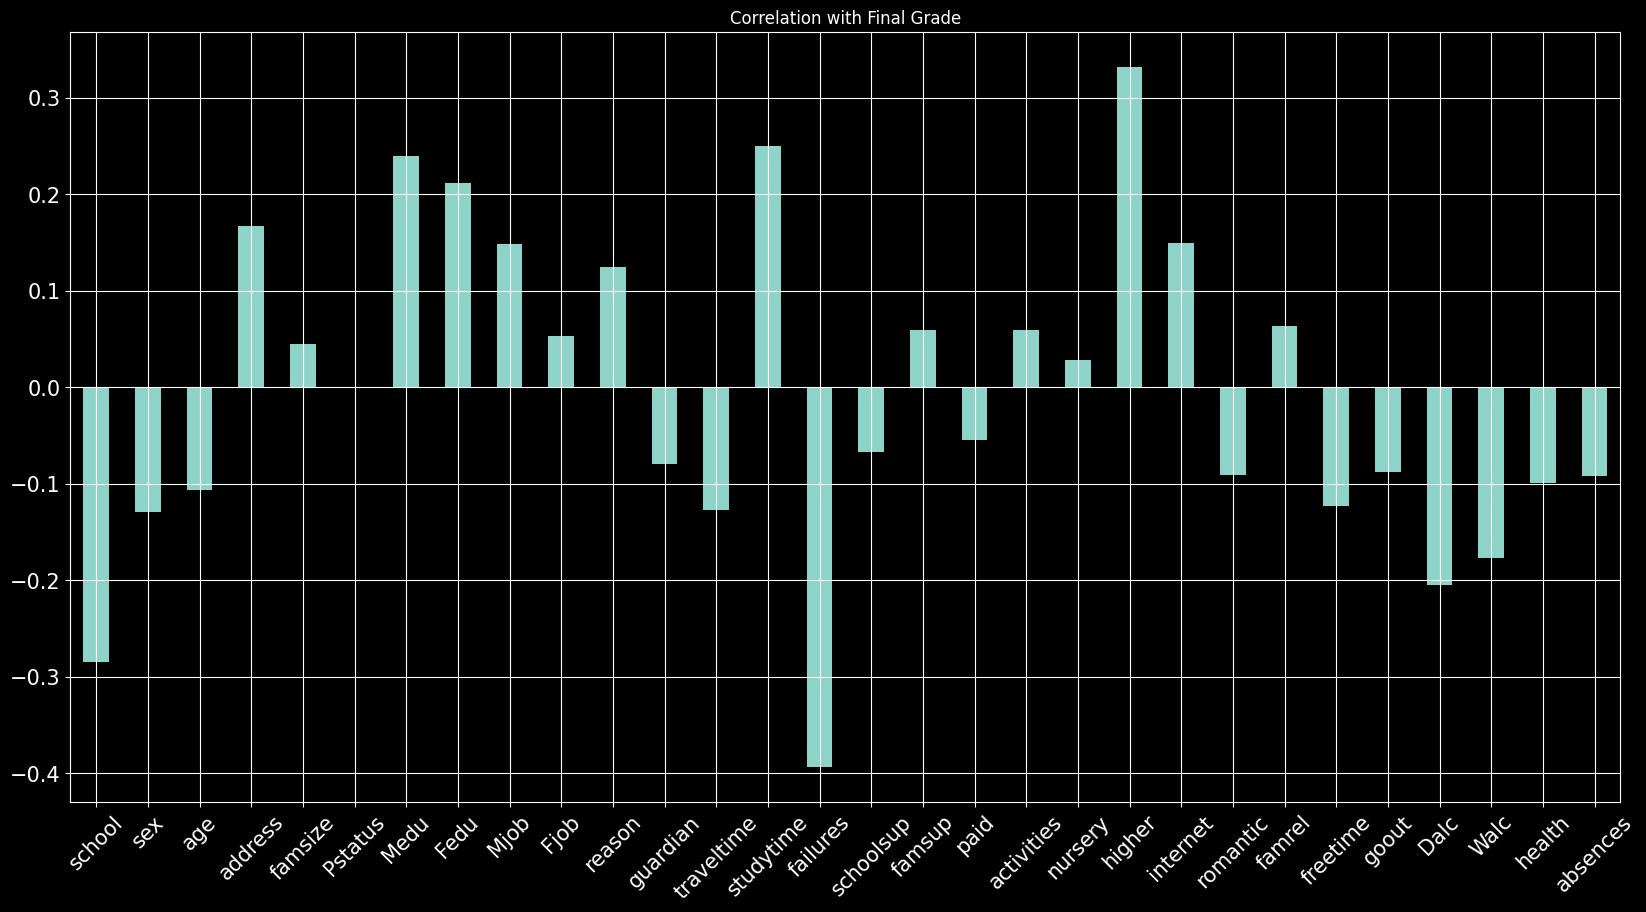

In [14]:
corr = X.corrwith(data["G3"])
print(corr)
# plot correlation
corr.plot.bar(
    figsize = (20, 10),
    title = "Correlation with Final Grade",
    fontsize = 15,
    rot = 45,
    grid = True
)

In [11]:
%%time
log_data = []
best_report = None
curr_best_model = None
best_f1 = 0
for i in range(20, 80):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=i / 100, random_state=42)
    lr = LogisticRegression()
    model = lr.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]

    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    if f1 > best_f1 and 80 > i > 20:
        best_f1 = f1
        curr_best_model = model
        best_report = classification_report(y_test, y_pred)
    log_data.append({'Iteration': i, 'F1 Score': f1, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})



CPU times: user 13 s, sys: 17.3 s, total: 30.3 s
Wall time: 2.84 s


In [9]:
log_df = pd.DataFrame(log_data)
print(best_report)
log_df.to_csv(f"../reports/logistic_regression.csv", index=False)

              precision    recall  f1-score   support

           0       0.77      0.65      0.70        88
           1       0.62      0.75      0.68        68

    accuracy                           0.69       156
   macro avg       0.70      0.70      0.69       156
weighted avg       0.71      0.69      0.69       156


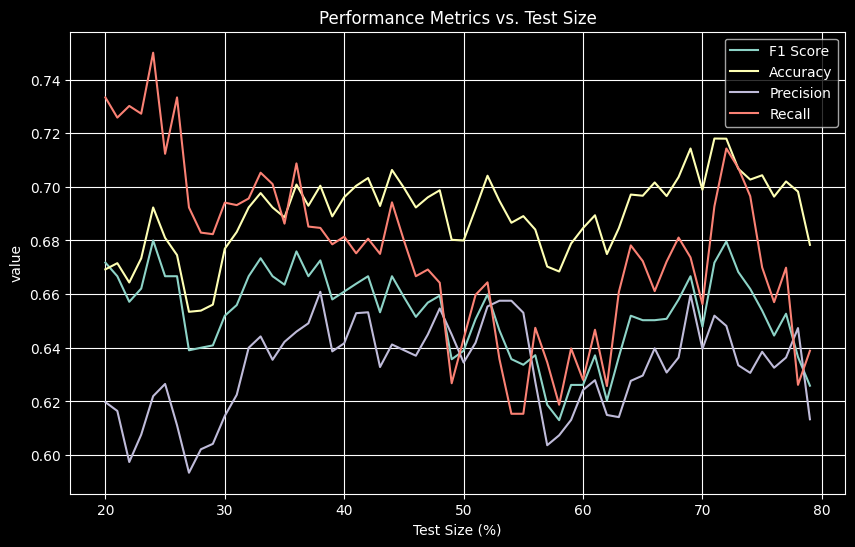

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.plot(log_df['Iteration'], log_df['F1 Score'], label='F1 Score')
plt.plot(log_df['Iteration'], log_df['Accuracy'], label='Accuracy')
plt.plot(log_df['Iteration'], log_df['Precision'], label='Precision')
plt.plot(log_df['Iteration'], log_df['Recall'], label='Recall')

plt.xlabel('Test Size (%)')
plt.ylabel('value')
plt.title('Performance Metrics vs. Test Size')
plt.legend()
plt.grid(True)
plt.show()